<a href="https://colab.research.google.com/github/JEduardoDimasR/Proyecto-personal/blob/main/Clasificaci%C3%B3n_de_cr%C3%A9ditos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías

In [ ]:
#Warnings
import warnings
warnings.filterwarnings('ignore')

#Librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

## Cargar datos

In [ ]:
df = pd.read_csv( "Credit.csv" )

## Comprender la información de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
df.shape

(1000, 14)

Se cuenta con un conjunto de datos de 1000 observaciones y 14 variables, entre las cuales algunas son de tipo objeto, es decir, categóricas.

In [ ]:
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

El conjunto de datos no cuenta con valores de tipo NaN.

## Comprender el diccionario de los datos

| **Nombre**   | **Descripción** |
| :--------: | :----:|
| **checkin_acc**     | Estado de la cuenta corriente existente  |
| **duration**    | Duración del crédito otorgado en meses   |
| **credit_history**  | Historial de crédito  |
| **amount**  | Monto del crédito/préstamo|
| **savings_acc**  | Saldo en cuenta de ahorro   |
| **present_emp_since**  | Empleo en años  |
| **inst_rate**  |Tasa de pago a plazos  |
| **personal_status**  | Estado civil  |
| **residing_since**  | Residencia en años   |
| **age**  | Edad en años  |
| **inst_plans**  | Otros planes de pago a plazos del solicitante|
| **num_credits**  | Número de créditos existentes en este banco |
| **job**  | Trabajo |
| **status**  | Estado de crédito  |

## Comprender la estructura de los datos

Comprender la estructura de los datos es un aspecto fundamental de los proyectos de la ciencia de datos, ya que juega un papel crucial, porque los datos se han organizado, almacenado y manipulado para lograr eficiencia.  

In [ ]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


Al observar la estructura de datos, queda claro que se requiere realizar una clasificación binaria numérica (0 y 1), ya que existen múltiples categorías presentes en cada columna.

### Contar el número de observaciones de buenos y malos créditos en el conjunto de datos

In [ ]:
df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

La salida muestra que se tienen 700 observaciones de buenos créditos y 300 observaciones de malos créditos.

## Preparación para la construcción del modelo de clasificación

Para construir un modelo de clasificación, la columna de *status* se utilizará como variable dependiente, mientras que las columnas restantes serán variables independientes. Se crea una lista llamada *X_features* y se almacenan los nombres de todas las variables independientes para uso posterior.

In [ ]:
X_features = list( df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

## Codificación de variables categóricas

Como se mencionó previamente, el conjunto de datos contiene varias variables categóricas que requieren codificación mediante variables dummy. En este proceso, se elimina la primera variable independiente para prevenir la multicolinealidad en el modelo de regresión que se construira.

In [ ]:
encoded_df = pd.get_dummies( df[X_features], drop_first = True ).astype(int)
list(encoded_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

El conjunto de datos con todas las variables independientes previamente codificadas será el siguiente:

In [ ]:
encoded_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


Finalmente, contamos con 29 variables independientes que se utilizarán en el modelo.

## X, Y

Una vez preparadas las variables, se pueden establecer las variables X (características) e Y (resultado) antes de proceder a construir el modelo. Se necesita agregar una nueva columna y establecer el valor en 1, para que el modelo de regresión logística estime la intersección.

In [ ]:
Y = df.status
X = sm.add_constant(encoded_df)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3,random_state = 42)

In [ ]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [ ]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2023-10-24 23:09  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

In [ ]:
def get_significant_vars( lm ):
    #Guarda los p-values y los nombres de las columnas correspondientes en un dataframe
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df["vars"] = var_p_vals_df.index
    var_p_vals_df.index = range(len(var_p_vals_df["vars"]))
    var_p_vals_df.columns = ["pvals", "vars"]
    # Filtra los nombres de las columnas donde los p-values son menores a 0.05
    return var_p_vals_df[var_p_vals_df["pvals"]<=0.05],list(var_p_vals_df[var_p_vals_df["pvals"]<=0.05]["vars"])

sgv = get_significant_vars(logit_model)

sgv[0]

,pvals,vars
1,4.629398e-02,duration
2,1.747666e-02,amount
3,1.881840e-03,inst_rate
5,2.689338e-02,age
8,3.690689e-02,checkin_acc_A13
9,5.388728e-10,checkin_acc_A14
13,1.814378e-03,credit_history_A34
17,2.724103e-02,savings_acc_A65


In [ ]:
significant_vars = sgv[1]
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [ ]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train [significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [ ]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2023-10-24 23:14 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [ ]:
y_pred_df= pd.DataFrame( {"actual": y_test,
"predicted_prob": final_logit.predict(
sm.add_constant( X_test[significant_vars]))})

In [ ]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [ ]:
y_pred_df["predicted"] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

y_pred_df

,actual,predicted_prob,predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
...,...,...,...
468,0,0.178787,0
935,1,0.587925,1
428,0,0.091998,0
7,0,0.571859,1


In [ ]:
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm,annot=True, fmt=".2f",xticklabels=["Mal crédito","Buen crédito"],
               yticklabels = ["Mal crédito","Buen Crédito"])
    plt.ylabel("Etiqueta real")
    plt.xlabel("Etiqueta predicha")
    plt.show()

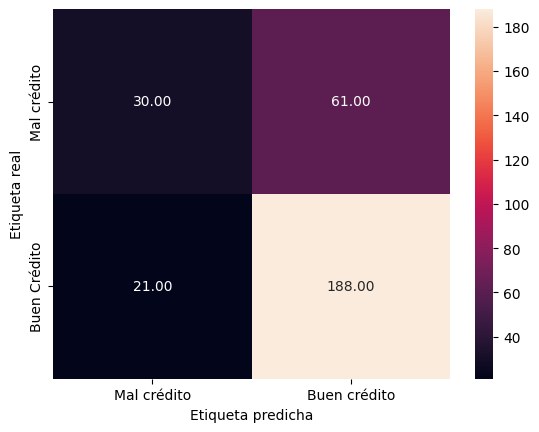

In [ ]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [ ]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



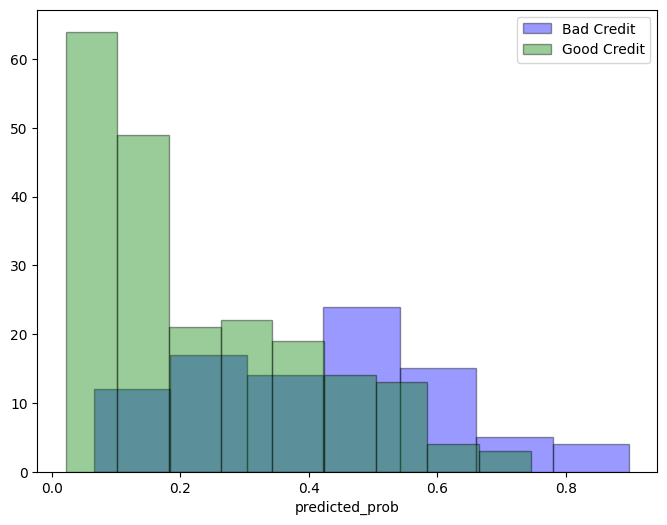

In [ ]:
plt.figure( figsize = (8,6) )
# Crear histograma para "Bad Credit" en azul
sn.distplot(y_pred_df[y_pred_df['actual'] == 1]['predicted_prob'], kde=False, color='b', label='Bad Credit', hist_kws={'edgecolor': 'black'})

# Crear histograma para "Good Credit" en verde
sn.distplot(y_pred_df[y_pred_df['actual'] == 0]['predicted_prob'], kde=False, color='g', label='Good Credit', hist_kws={'edgecolor': 'black'})
plt.legend()
plt.show()

In [ ]:
def draw_roc( actual, probs ):

    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='Curva ROC (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos o [1 - Tasa de Verdaderos Negativos]')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

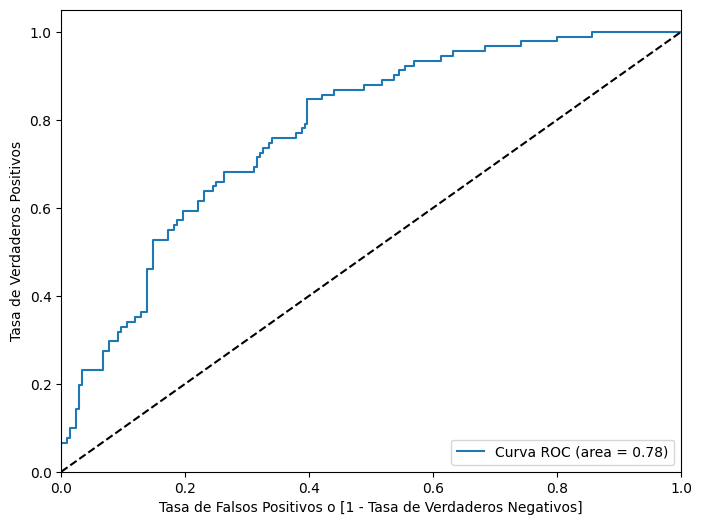

In [ ]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

In [ ]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.78

In [ ]:
tpr_fpr = pd.DataFrame( { "tpr": tpr,"fpr": fpr,"thresholds": thresholds } )

tpr_fpr["diff"] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( "diff", ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [ ]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > round(tpr_fpr.loc[160,"thresholds"],2) else 0)

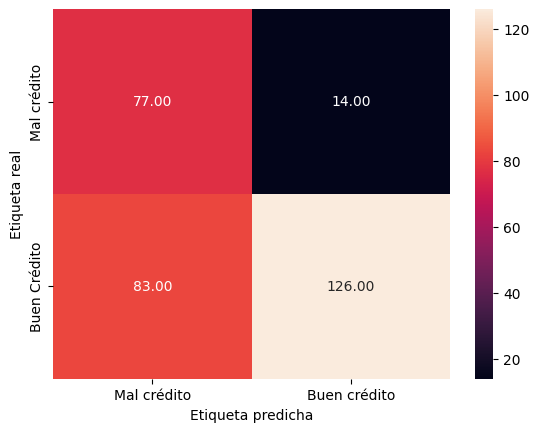

In [ ]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new)

In [ ]:
print(metrics.classification_report( y_pred_df.actual, y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



In [ ]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    # Get the confusion matrix and calculate cost
    cm = metrics.confusion_matrix( actual, predicted, labels = [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [ ]:
cost_df = pd.DataFrame( columns = ["prob", "cost"])

In [ ]:
idx = 0
for each_prob in range(10, 50):
    cost = get_total_cost( y_pred_df.actual, y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [ ]:
cost_df.sort_values( "cost", ascending = True )[0:5]

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


In [ ]:
y_pred_df["predicted_using_cost"] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.14 else 0)

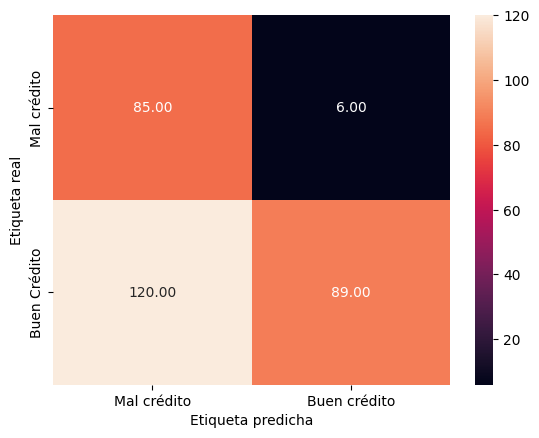

In [ ]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_using_cost )